In [1]:
%load_ext autoreload
%autoreload 2
import Function as ut

In [2]:
dictonary_of_nucleotides = ut.histogramACGT('reads.sorted.bam')

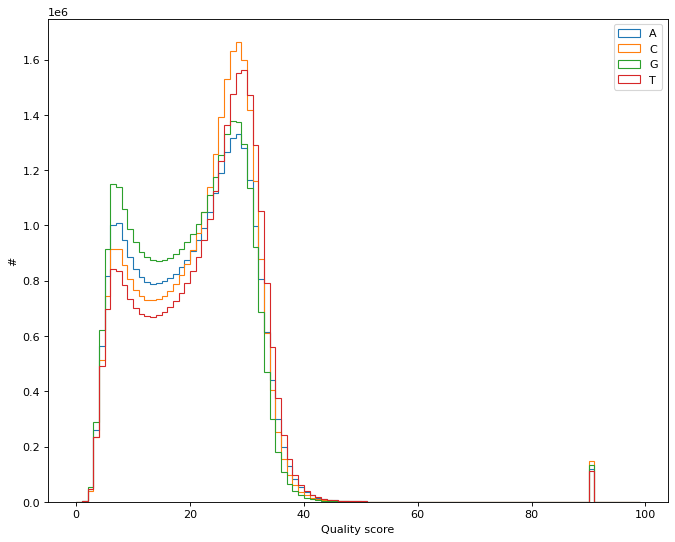

In [3]:
ut.plt.figure(figsize=(10,8), dpi=80)

for x in ['A','C','G','T']:
    ut.plt.hist(dictonary_of_nucleotides[x].keys(),weights=dictonary_of_nucleotides[x].values(),bins=ut.np.arange(100), histtype='step',label=x)
ut.plt.legend()
ut.plt.xlabel('Quality score')
ut.plt.ylabel('#')
ut.plt.show()

### Average number of reads in our data

In [4]:
number_of_reads = ut.average_number_of_reads('reads.sorted.bam')

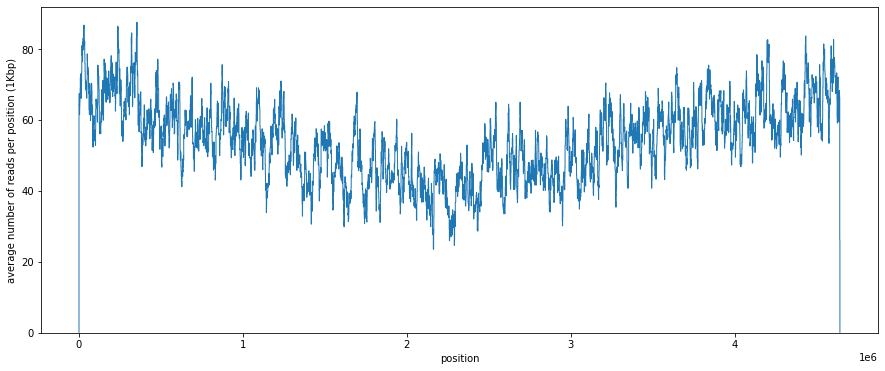

In [5]:
ut.plt.figure(figsize=(15, 6))
step = 1000
L = len(number_of_reads)
bins = ut.np.arange(0, L + step + 1, step)
ut.plt.hist(ut.np.arange(L), weights=ut.np.array(number_of_reads)/step, bins=bins, histtype='step')
ut.plt.xlabel("position")
ut.plt.ylabel("average number of reads per position (1Kbp)")
ut.plt.show()
#plt.savefig("Numer_of_reads.png")

### Average quality of the data at each position

In [6]:
avg_quality = ut.average_quality('reads.sorted.bam')

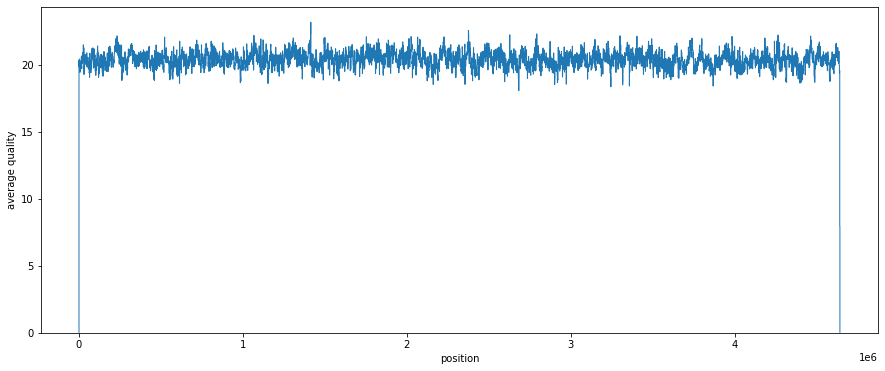

In [8]:
ut.plt.figure(figsize=(15, 6))
step = 1000
L = len(avg_quality)
bins = ut.np.arange(0, L + step + 1, step)
ut.plt.hist(ut.np.arange(L), weights=ut.np.array(avg_quality)/step, bins=bins, histtype='step')
ut.plt.xlabel("position")
ut.plt.ylabel("average quality")
ut.plt.show()

### Distribution of the error from the reference nucleotide and the query nucleotide

In [4]:
matrice_of_quality = ut.read_quality_seq_single('reads.sorted.bam','assembled_genome/assembly.fsa')

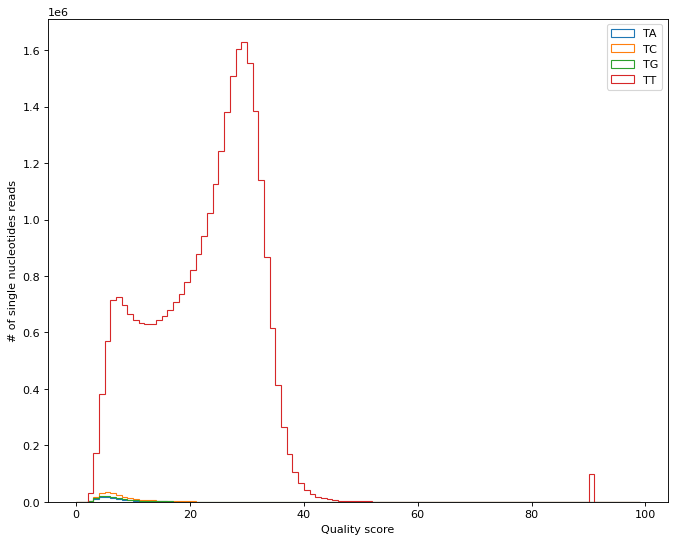

In [5]:
#plot the distribution of A,C,G,T
ut.plot_error("T", matrice_of_quality,'plot_T_reference_normed_quality.png', False, False, True)

### We saved the matrix data in a pickle object